<a href="https://colab.research.google.com/github/valeriafigueredo-data/modelos_descritivos/blob/main/Hands_On_1_e_2_Aula_08_08_2024_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Grupo: Sala 01

*   Arthur Wanderley Ferreira dos Santos
*   André Felipe Bezerra de Souza Leão
*   Manuela de Lacerda Bezerra Carvalho
*   Valéria Cristina Andrade Rodrigues de Figueredo
*   Thiago Wanderley Amorim

Objetivo:  O presente trabalho realizará o tratamento e a análise exploratória dos dados, assim como aplicará o método de Levenshtein para verificar quais músicas são próximas de um nome fornecido.

###[Dataset Link](https://raw.githubusercontent.com/devjaynemorais/modelos_descritivos_curso/main/Aula%2001/dados/dataset_lyrics.csv)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/devjaynemorais/modelos_descritivos_curso/main/Aula%2001/dados/dataset_lyrics.csv')

In [ ]:
df.head()

,cantorId,cantorNome,musicaNome,letra
0,0,10000-maniacs,More Than This,I could feel at the time. There was no way of ...
1,0,10000-maniacs,Because The Night,"Take me now, baby, here as I am. Hold me close..."
2,0,10000-maniacs,These Are Days,These are. These are days you'll remember. Nev...
3,0,10000-maniacs,A Campfire Song,"A lie to say, ""O my mountain has coal veins an..."
4,0,10000-maniacs,Everyday Is Like Sunday,Trudging slowly over wet sand. Back to the ben...


# Tratamento de dados
*   Valores nulos em letra
*   Músicas duplicadas por artista
*   Remoção de tablatura em letra


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49387 entries, 0 to 49386
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cantorId    49387 non-null  int64 
 1   cantorNome  49387 non-null  object
 2   musicaNome  49387 non-null  object
 3   letra       49376 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [ ]:
# Removendo dados onde a coluna letra apresenta valores nulos
df = df.dropna(subset=['letra'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49376 entries, 0 to 49386
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cantorId    49376 non-null  int64 
 1   cantorNome  49376 non-null  object
 2   musicaNome  49376 non-null  object
 3   letra       49376 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.9+ MB


In [ ]:
count = df['letra'].str.contains(r'\|-', regex=True).sum() + df['musicaNome'].str.contains('tablatura').sum()

# Removendo letras identificadas como tablatura
df = df[~df['musicaNome'].str.contains('tablatura', case=False, na=False)]

# Removendo letras que contém os caracteres |- (identificadores de tablatura)
df = df[~df['letra'].str.contains(r'\|-', regex=True)]

print(f"Total de tablaturas identificadas explicitamente (contendo o identificador tablatura em seu nome): {count}")

Total de tablaturas identificadas explicitamente (contendo o identificador tablatura em seu nome): 204


In [ ]:
# Removendo músicas duplicatas para cada artista
df = df.drop_duplicates(subset=['cantorNome', 'musicaNome'], keep='last')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38638 entries, 23 to 49386
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cantorId    38638 non-null  int64 
 1   cantorNome  38638 non-null  object
 2   musicaNome  38638 non-null  object
 3   letra       38638 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


# Análise de dados

In [ ]:
# Quantidade de artistas
total_artistas = len(df['cantorNome'].unique())
print(f'Quantidade de artistas: {total_artistas}')

Quantidade de artistas: 526


In [ ]:
# Quantidade de Músicas
unique = len(df['musicaNome'].unique())
print(f'Quantidade de Músicas com nomes diferentes: {unique} = {round((unique / len(df)) * 100, 2)}%')
print(f'Quantidade de Músicas com mesmo nome: {len(df) - unique} = {round(((len(df) - unique)/ len(df)) * 100, 2)}%')

Quantidade de Músicas com nomes diferentes: 33806 = 87.49%
Quantidade de Músicas com mesmo nome: 4832 = 12.51%


In [ ]:
# Apresentando coluna (caracteres_letra) com a quantidade total de caracteres das letras
df['caracteres_letra'] = df['letra'].apply(lambda x: len(x))
df.head()

,cantorId,cantorNome,musicaNome,letra,caracteres_letra
23,0,10000-maniacs,A Campfire Song,"A lie to say, ""O my mountain has coal veins an...",1283
24,0,10000-maniacs,A Room For Everything,"You were looking away from me, western skies c...",671
25,0,10000-maniacs,Across The Fields,"Well they left then in the morning, a hundred ...",645
26,0,10000-maniacs,All That Never Happens,"She walks alone on the brick lane,. the breeze...",1022
27,0,10000-maniacs,Among The Americans,[ music: Robert Buck & Dennis Drew/lyric: Nata...,945


In [ ]:
# Apresentando coluna (total_musicas) com total de músicas do artista
df['total_musicas'] = df.groupby('cantorNome')['cantorNome'].transform('count')
df.head()

,cantorId,cantorNome,musicaNome,letra,caracteres_letra,total_musicas
23,0,10000-maniacs,A Campfire Song,"A lie to say, ""O my mountain has coal veins an...",1283,110
24,0,10000-maniacs,A Room For Everything,"You were looking away from me, western skies c...",671,110
25,0,10000-maniacs,Across The Fields,"Well they left then in the morning, a hundred ...",645,110
26,0,10000-maniacs,All That Never Happens,"She walks alone on the brick lane,. the breeze...",1022,110
27,0,10000-maniacs,Among The Americans,[ music: Robert Buck & Dennis Drew/lyric: Nata...,945,110


In [ ]:
maior_musica = df['caracteres_letra'].max()
menor_musica = df['caracteres_letra'].min()
print(f"Letra com maior quantidade de caracteres: {maior_musica}")
print(f"Letra com menor quantidade de caracteres: {menor_musica}")

Letra com maior quantidade de caracteres: 10376
Letra com menor quantidade de caracteres: 3


In [ ]:
# Apresentando as músicas com menor e maior letra - Verificamos que existem tablaturas musicais
df_min_and_max = df[(df['caracteres_letra'] == menor_musica) | (df['caracteres_letra'] == maior_musica)]
df_min_and_max

,cantorId,cantorNome,musicaNome,letra,caracteres_letra,total_musicas
16341,188,david-bowie,It's No Game (part 1),1. 2. 1-2-2. Shiruetto ya kage ga kakumei o mi...,10376,458
35311,389,lenhadores-da-galaxia,A Música Mais Rápida que You Suffer do Napalm ...,Ah!,3,12


In [ ]:
# Obtendo o índice da linha onde 'total_musicas' é máximo
max_index = df['total_musicas'].idxmax()
min_index = df['total_musicas'].idxmin()

cantor_com_mais_musicas = df.loc[max_index]
cantor_com_menos_musicas = df.loc[min_index]

print(f"Artista com maior número de composições: {cantor_com_mais_musicas['cantorNome']}: {cantor_com_mais_musicas['total_musicas']} música(s)")
print(f"Artista com menor número de composições: {cantor_com_menos_musicas['cantorNome']}: {cantor_com_menos_musicas['total_musicas']} música(s)")

Artista com maior número de composições: elvis-presley: 759 música(s)
Artista com menor número de composições: 4seres: 1 música(s)


In [ ]:
df['caracteres_letra'].describe()

,caracteres_letra
count,38638.000000
mean,1028.050805
std,518.344031
min,3.000000
25%,690.000000
50%,957.500000
75%,1284.000000
max,10376.000000


In [ ]:
df['total_musicas'].describe()

,total_musicas
count,38638.000000
mean,177.369222
std,141.549124
min,1.000000
25%,94.000000
50%,138.000000
75%,218.000000
max,759.000000


In [ ]:
df['caracteres_musicaNome'] = df['musicaNome'].apply(lambda x: len(x))
df.head()

,cantorId,cantorNome,musicaNome,letra,caracteres_letra,total_musicas,caracteres_musicaNome
23,0,10000-maniacs,A Campfire Song,"A lie to say, ""O my mountain has coal veins an...",1283,110,15
24,0,10000-maniacs,A Room For Everything,"You were looking away from me, western skies c...",671,110,21
25,0,10000-maniacs,Across The Fields,"Well they left then in the morning, a hundred ...",645,110,17
26,0,10000-maniacs,All That Never Happens,"She walks alone on the brick lane,. the breeze...",1022,110,22
27,0,10000-maniacs,Among The Americans,[ music: Robert Buck & Dennis Drew/lyric: Nata...,945,110,19


In [ ]:
# Exibindo faixas com menor e maior número de caracteres
df_min_and_max_nome_faixa = df[(df['caracteres_musicaNome'] == df['caracteres_musicaNome'].min()) | (df['caracteres_musicaNome'] == df['caracteres_musicaNome'].max())]
df_min_and_max_nome_faixa

,cantorId,cantorNome,musicaNome,letra,caracteres_letra,total_musicas,caracteres_musicaNome
3687,43,arctic-monkeys,7,Well I wrote my number down. Never wrote it do...,969,127,1
7395,99,black-sabbath,I,I am anger. Under pressure. Lost in cages. A p...,1020,179,1
10831,125,bullet-for-my-valentine,V,(Instrumental Intro),20,93,1
12675,147,chantal-kreviazuk,M,Words & Music: Chantal Kreviazuk. They must me...,1104,73,1
14326,164,coldplay,O,A flock of birds. Hovering above. Just a flock...,594,198,1
17977,207,disturbed,3,I often wonder why I sit and wait to die. What...,2312,126,1
23165,250,fall-out-boy,Get Busy Living Or Get Busy Dying (do Your Par...,This has been said so many times that I'm not ...,1917,142,90
34317,373,kiss,I,I was so frightened. I almost ran away. I didn...,1238,276,1


In [ ]:
total_one_char_musica_nome = df[df['caracteres_musicaNome'] == 1]
total_one_char_musica_nome = total_one_char_musica_nome['caracteres_musicaNome'].sum()
print(f"Total de músicas cuja faixa possui 1 caracter: {total_one_char_musica_nome} = {round((total_one_char_musica_nome / len(df) * 100), 2)}%")

Total de músicas cuja faixa possui 1 caracter: 7 = 0.02%


In [ ]:
max_index = df['caracteres_musicaNome'].idxmax()
min_index = df['caracteres_musicaNome'].idxmin()

artis_menor_nome_faixa = df.loc[min_index]
artis_maior_nome_faixa = df.loc[max_index]

print(f"Artista com menor nome de faixa: {artis_menor_nome_faixa['cantorNome']}: {artis_menor_nome_faixa['caracteres_musicaNome']} caracter(s) - Faixa: {artis_menor_nome_faixa['musicaNome']}")
print(f"Artista com maior nome de faixa: {artis_maior_nome_faixa['cantorNome']}: {artis_maior_nome_faixa['caracteres_musicaNome']} caracteres(s)- Faixa: {artis_maior_nome_faixa['musicaNome']}")

Artista com menor nome de faixa: arctic-monkeys: 1 caracter(s) - Faixa: 7
Artista com maior nome de faixa: fall-out-boy: 90 caracteres(s)- Faixa: Get Busy Living Or Get Busy Dying (do Your Part To Save The Scene And Stop Going To Shows)


In [ ]:
df['caracteres_musicaNome'].describe()

,caracteres_musicaNome
count,38638.000000
mean,15.584839
std,8.316377
min,1.000000
25%,10.000000
50%,14.000000
75%,19.000000
max,90.000000


In [ ]:
# Verificando correlação entre o tamanho do nome da música e o tamanho da letra
selected_columns = df[['caracteres_musicaNome', 'caracteres_letra']]
correlation = selected_columns.corr()
correlation

,caracteres_musicaNome,caracteres_letra
caracteres_musicaNome,1.000000,0.086219
caracteres_letra,0.086219,1.000000


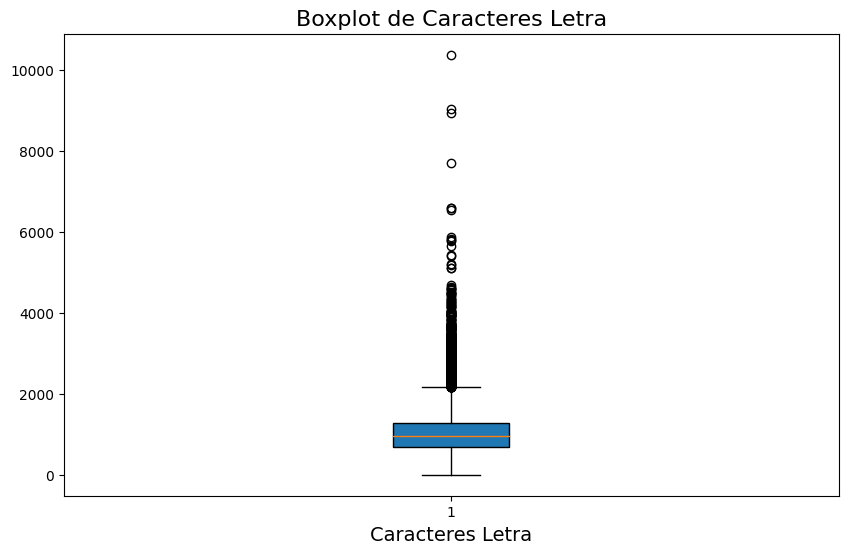

In [ ]:
plt.figure(figsize=(10, 6))
# Criar o boxplot
plt.boxplot(df['caracteres_letra'], patch_artist=True)
plt.title('Boxplot de Caracteres Letra', fontsize=16)
plt.xlabel('Caracteres Letra', fontsize=14)
plt.show()

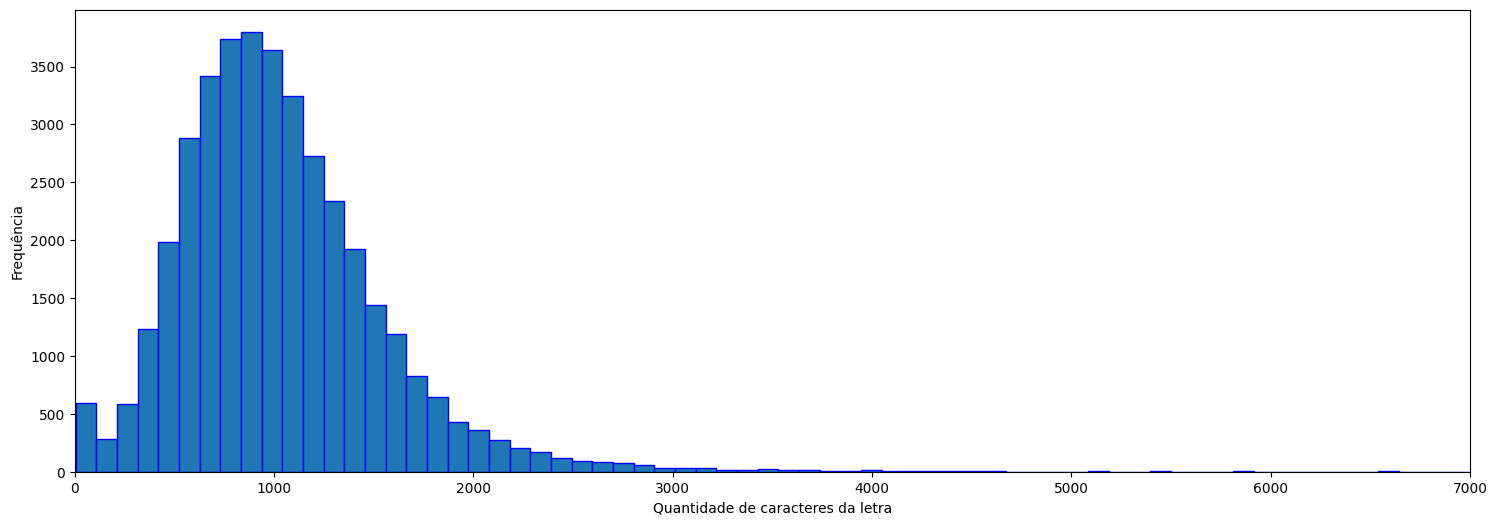

In [ ]:
# Criar o histograma
plt.figure(figsize=(18,6))
plt.hist(df['caracteres_letra'], bins=100, edgecolor='Blue')
plt.xlabel('Quantidade de caracteres da letra')
plt.ylabel('Frequência')
plt.xlim(left=0, right=7000)
plt.show()

In [ ]:
total_caracteres = df[df['caracteres_letra'] >= 4000]
len(total_caracteres)

52

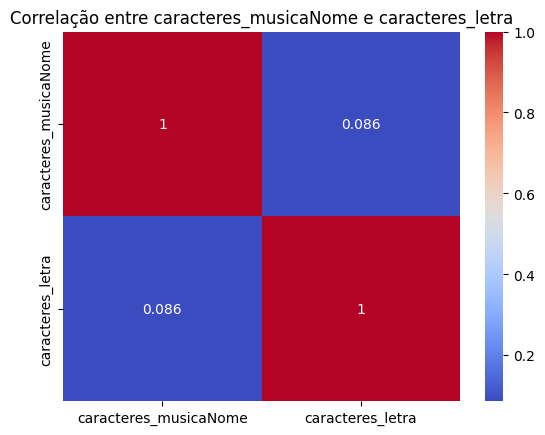

In [ ]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlação entre caracteres_musicaNome e caracteres_letra')
plt.show()

In [ ]:
def find_word_in_all_lyrics(word):
  return df[df['letra'].str.contains(word, na=False, case=False)]

def find_word_in_lyric(music, word):
  resultado = df[df['musicaNome'] == music]
  return resultado[resultado['letra'].str.contains(word, na=False, case=False)]


find_word_in_all_lyrics('Brazil').head()

,cantorId,cantorNome,musicaNome,letra,caracteres_letra,total_musicas,caracteres_musicaNome
672,8,a-day-to-remember,If I Leave,Let's go!. In the beginning I was up front. No...,2162,81,10
708,8,a-day-to-remember,This Is The House That Doubt Built,Don’t get me started on what it means to be al...,1848,81,34
3563,42,the-arcade-fire,Brazil,"Brazil. Where hearts were entertaining June,. ...",772,107,6
5982,84,beastie-boys,One Chance,I'm going to audition and I do not. think I'll...,1131,188,10
6050,84,beastie-boys,To All The Girls,Yea.... To all the Brooklyn girls. To all the ...,372,188,16


##Hands On 2

In [ ]:
df['letra'] = df['letra'].str.lower()
df['musicaNome'] = df['musicaNome'].str.lower()
df.head()

,cantorId,cantorNome,musicaNome,letra,caracteres_letra,total_musicas,caracteres_musicaNome
23,0,10000-maniacs,a campfire song,"a lie to say, ""o my mountain has coal veins an...",1283,110,15
24,0,10000-maniacs,a room for everything,"you were looking away from me, western skies c...",671,110,21
25,0,10000-maniacs,across the fields,"well they left then in the morning, a hundred ...",645,110,17
26,0,10000-maniacs,all that never happens,"she walks alone on the brick lane,. the breeze...",1022,110,22
27,0,10000-maniacs,among the americans,[ music: robert buck & dennis drew/lyric: nata...,945,110,19


In [ ]:
!pip install Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 29.0 MB/s eta 0:00:00


In [ ]:
import Levenshtein

In [ ]:
def calcular_distancia_levenshtein_musica(texto):
    texto = texto.lower()
    df['distancia'] = df['musicaNome'].apply(lambda x: Levenshtein.distance(texto, x))

    melhor_correspondencia = df.sort_values(by='distancia').head(10)
    distances = []

    for _, row in melhor_correspondencia.iterrows():
        objeto = {
            'musicaNome': row['musicaNome'],
            'distancia': row['distancia'],
            'cantorNome': row['cantorNome']
        }
        distances.append(objeto)

    return distances

In [ ]:
def show_top_10_items(distances):
  conta = 1
  for i in resultados:
    print(str(conta) + 'º: Artista: ' + str(i['cantorNome']) + ', Música: ' + str(i['musicaNome']) +', com distância de Levenshtein ' +  str(i['distancia']))
    conta += 1

In [ ]:
resultados = calcular_distancia_levenshtein_musica('Champions of the world')
show_top_10_items(resultados)

1º: Artista: descendents, Música: jealous of the world, com distância de Levenshtein 6
2º: Artista: fleetwood-mac, Música: man of the world, com distância de Levenshtein 7
3º: Artista: marillion, Música: map of the world, com distância de Levenshtein 7
4º: Artista: naruto, Música: man of the world, com distância de Levenshtein 7
5º: Artista: aerosmith, Música: woman of the world, com distância de Levenshtein 7
6º: Artista: chantal-kreviazuk, Música: weight of the world, com distância de Levenshtein 8
7º: Artista: eric-clapton, Música: change the world, com distância de Levenshtein 8
8º: Artista: papa-roach, Música: top of the world, com distância de Levenshtein 8
9º: Artista: patti-smith, Música: changing of the guard, com distância de Levenshtein 8
10º: Artista: bryan-adams, Música: the way of the world, com distância de Levenshtein 8
